In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [66]:
data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

In [67]:
all_data = pd.concat([data, test_data], sort=False)

In [68]:
all_data['fnlwgt_log'] = np.log(all_data['fnlwgt'])

In [105]:
all_data = all_data.drop('fnlwgt', 1)

In [106]:
data.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [113]:
data['income'] = (data['income'] == '>50K').astype(int)

In [121]:
all_data['income'] = (data['income'] == '>50K').astype(int)

In [5]:
data.groupby(['sex', 'income'])['income'].count()

sex     income
Female  0          7614
        1           953
Male    0         12130
        1          5352
Name: income, dtype: int64

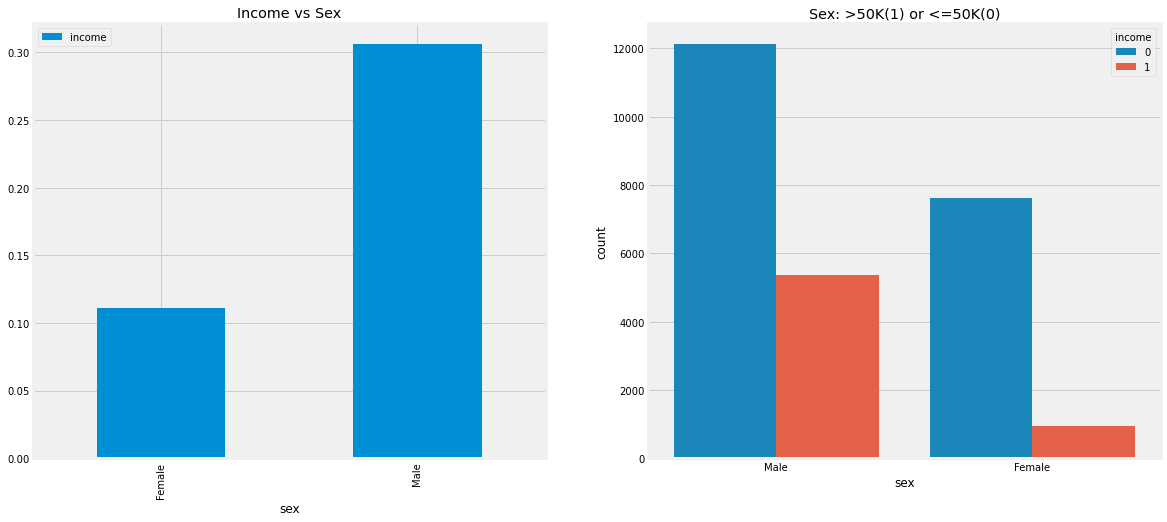

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['sex', 'income']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title("Income vs Sex")
sns.countplot('sex', hue='income', data=data, ax=ax[1])
ax[1].set_title("Sex: >50K(1) or <=50K(0)")
plt.show()

education_num -> Ordinal Feature

In [7]:
pd.crosstab(data.education_num,data.income,margins=True).style.background_gradient(cmap='summer_r')

income,0,1,All
education_num,,,
1,40,0,40
2,129,5,134
3,252,13,265
4,476,29,505
5,396,22,418
6,678,53,731
7,867,55,922
8,333,26,359
9,7096,1337,8433


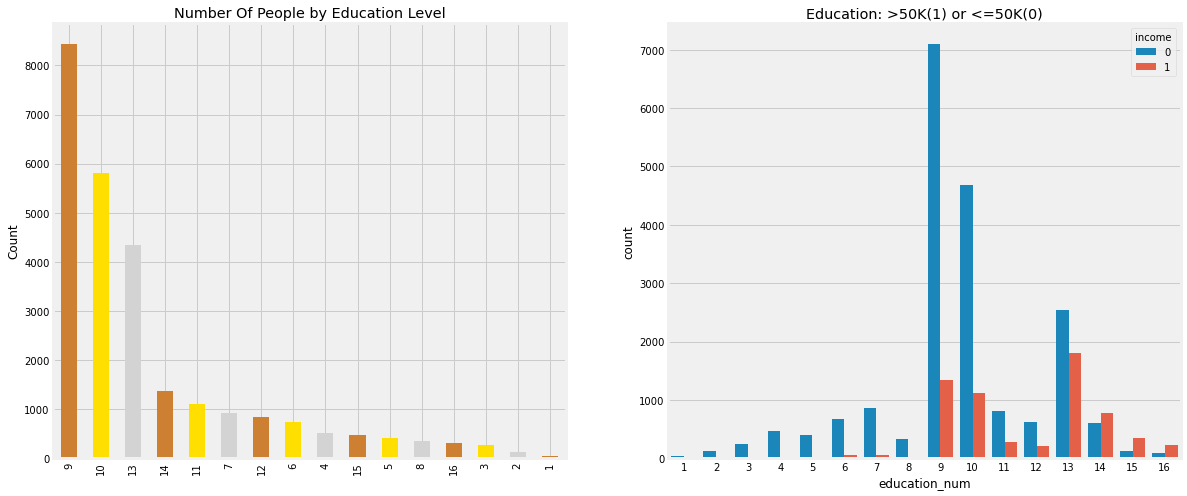

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['education_num'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of People by Education Level')
ax[0].set_ylabel('Count')
sns.countplot('education_num', hue='income', data=data, ax=ax[1])
ax[1].set_title('Education: >50K(1) or <=50K(0)')
plt.show()

In [9]:
pd.crosstab([data.sex, data.income], data.education_num, margins=True).style.background_gradient(cmap='summer_r')

In [69]:
education_map = {
    'Preschool': 'level_0', 
    '1st-4th': 'level_1', 
    '5th-6th': 'level_1', 
    '7th-8th': 'level_1', 
    '9th': 'level_1', 
    '10th': 'level_1', 
    '11th': 'level_1', 
    '12th': 'level_1', 
    'HS-grad': 'level_2', 
    'Some-college': 'level_3', 
    'Assoc-acdm': 'level_4', 
    'Assoc-voc': 'level_4', 
    'Bachelors': 'level_5', 
    'Masters': 'level_6', 
    'Prof-school': 'level_7', 
    'Doctorate': 'level_7',
}

In [70]:
all_data['education'] = all_data['education'].map(education_map)

In [71]:
all_data['education'].value_counts()

level_2    10501
level_3     7291
level_5     5355
level_1     4202
level_4     2449
level_6     1723
level_7      989
level_0       51
Name: education, dtype: int64

In [72]:
all_data = all_data.drop('education_num', 1)

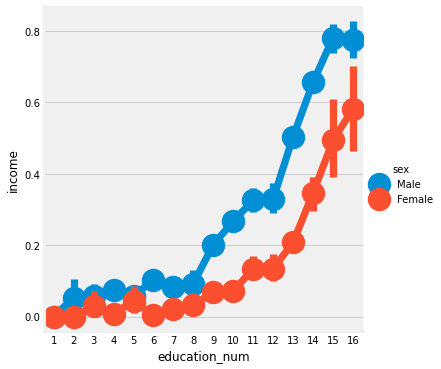

In [10]:
sns.factorplot('education_num', 'income', hue='sex', data=data)
plt.show()

Age -> Continuous Feature

In [11]:
print('Oldest Passenger was of:',data['age'].max(),'Years')
print('Youngest Passenger was of:',data['age'].min(),'Years')
print('Average Age on the People:',data['age'].mean(),'Years')

Oldest Passenger was of: 90 Years
Youngest Passenger was of: 17 Years
Average Age on the People: 38.56923490345119 Years


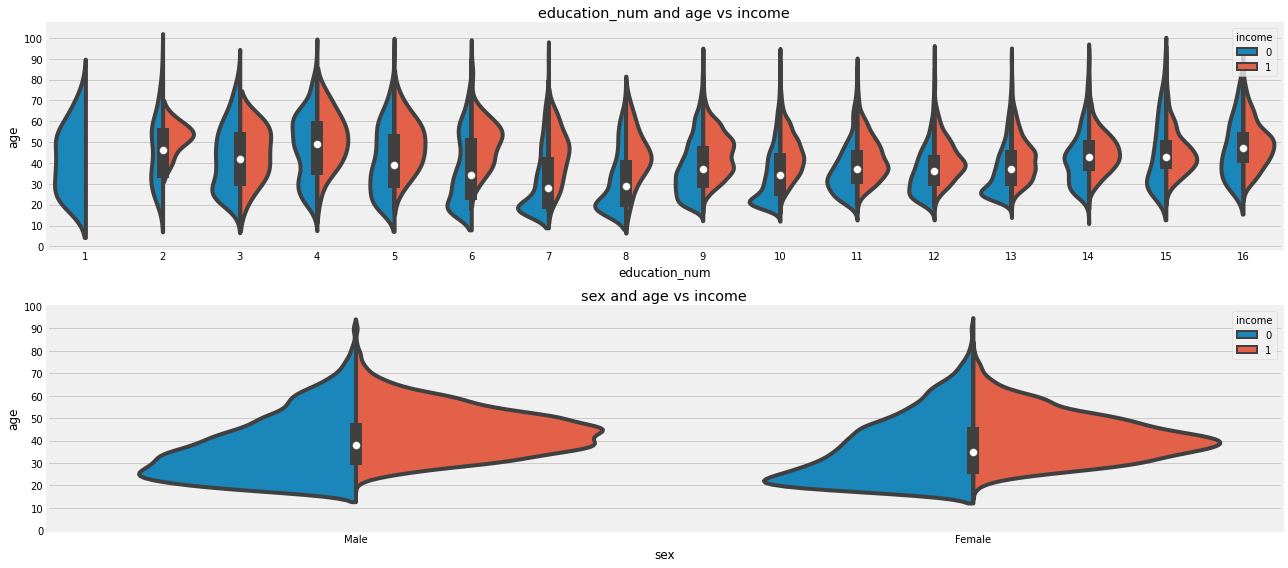

In [12]:
f, ax = plt.subplots(2,1, figsize=(18, 8))
sns.violinplot('education_num', 'age', hue='income', data=data, split=True, ax=ax[0])
ax[0].set_title('education_num and age vs income')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('sex', 'age', hue='income', data=data, split=True, ax=ax[1])
ax[1].set_title('sex and age vs income')
ax[1].set_yticks(range(0,110,10))
f.tight_layout()
plt.show()

In [13]:
import missingno as msno

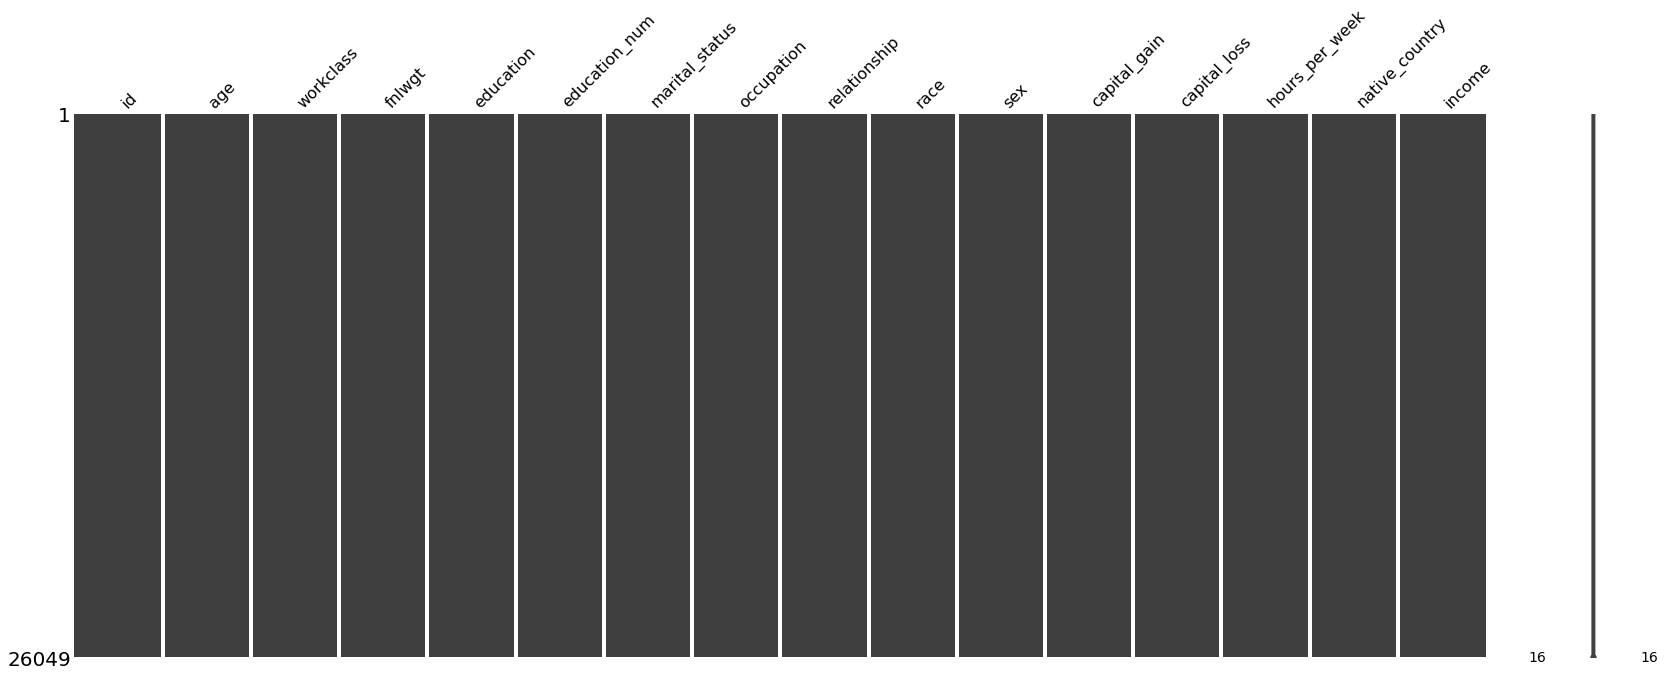

In [14]:
msno.matrix(data)

In [15]:
data.isnull().any()

id                False
age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country    False
income            False
dtype: bool

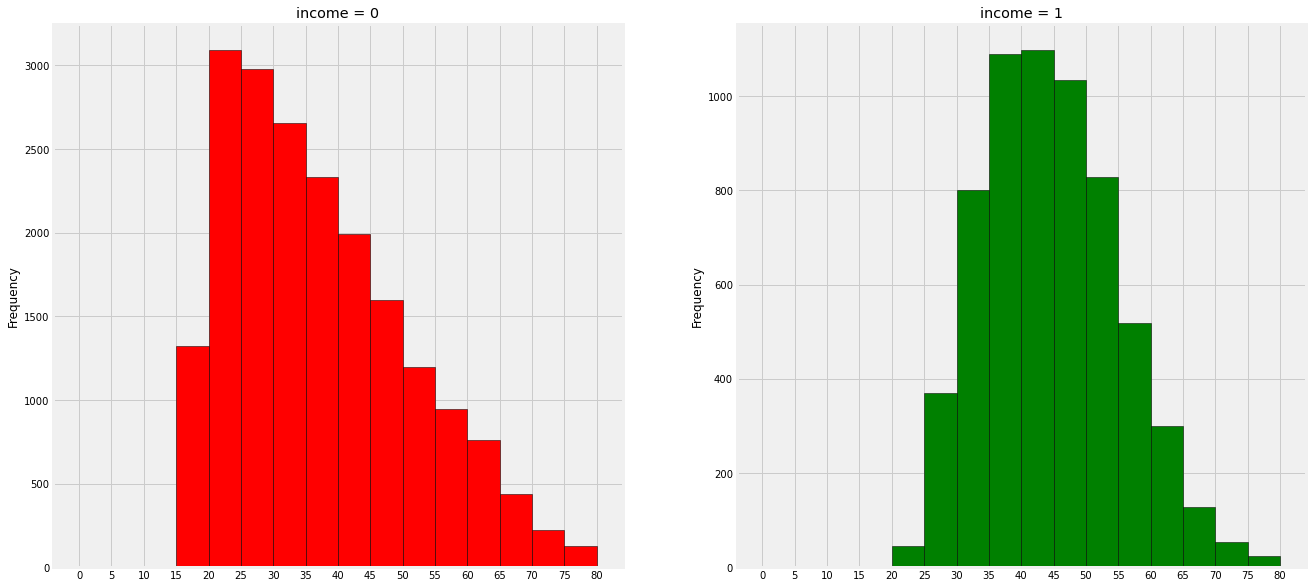

In [16]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].set_title('income = 0')
x1 = list(range(0,85,5))
data[data['income']==0].age.plot.hist(ax=ax[0],bins=x1, edgecolor='black',color='red') # data[data['income']==0].age.plot.hist(ax=ax[0],bins=20, edgecolor='black',color='red')
ax[0].set_xticks(x1)
ax[1].set_title('income = 1')
x2 = list(range(0,85,5))
data[data['income']==1].age.plot.hist(ax=ax[1], bins=x2, edgecolor='black', color='green')
ax[1].set_xticks(x2)
plt.show()

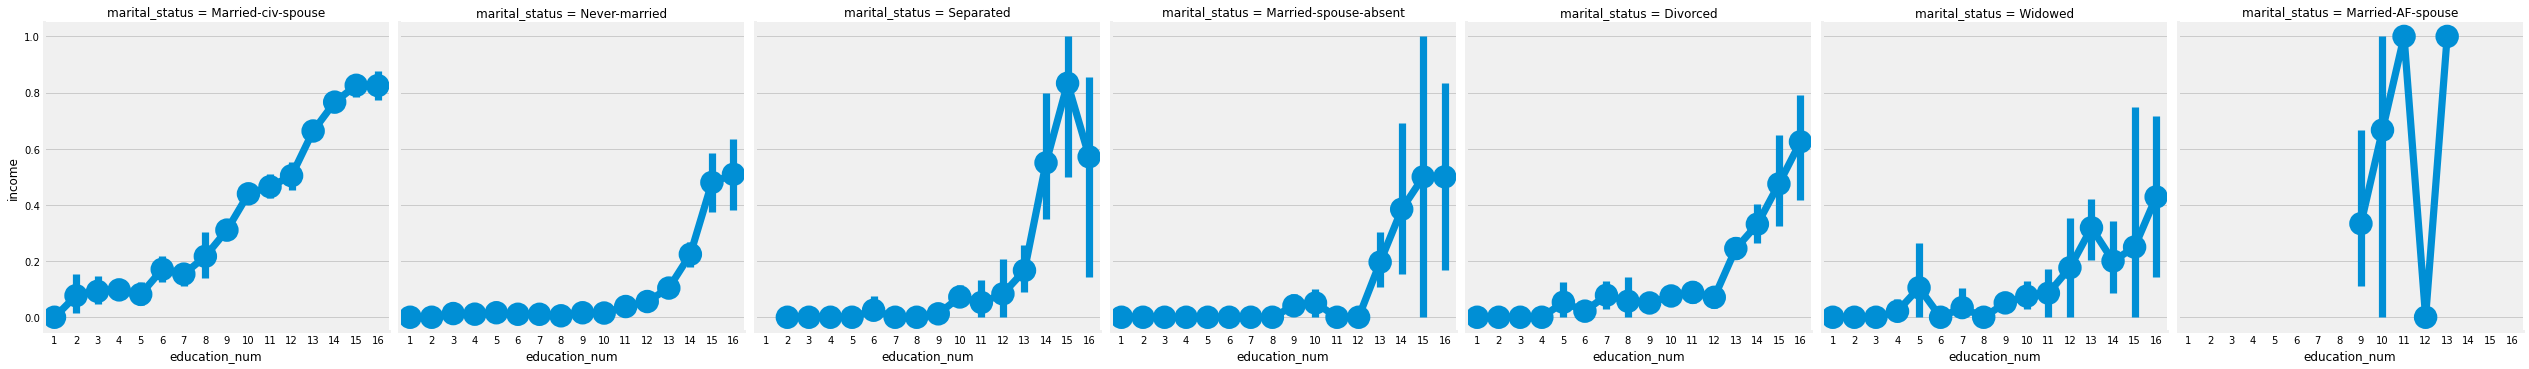

In [17]:
sns.factorplot('education_num', 'income', col='marital_status', data=data)
plt.show()

In [18]:
pd.crosstab([data.sex, data.income],[data.occupation, data.education_num],margins=True).style.background_gradient(cmap='summer_r')

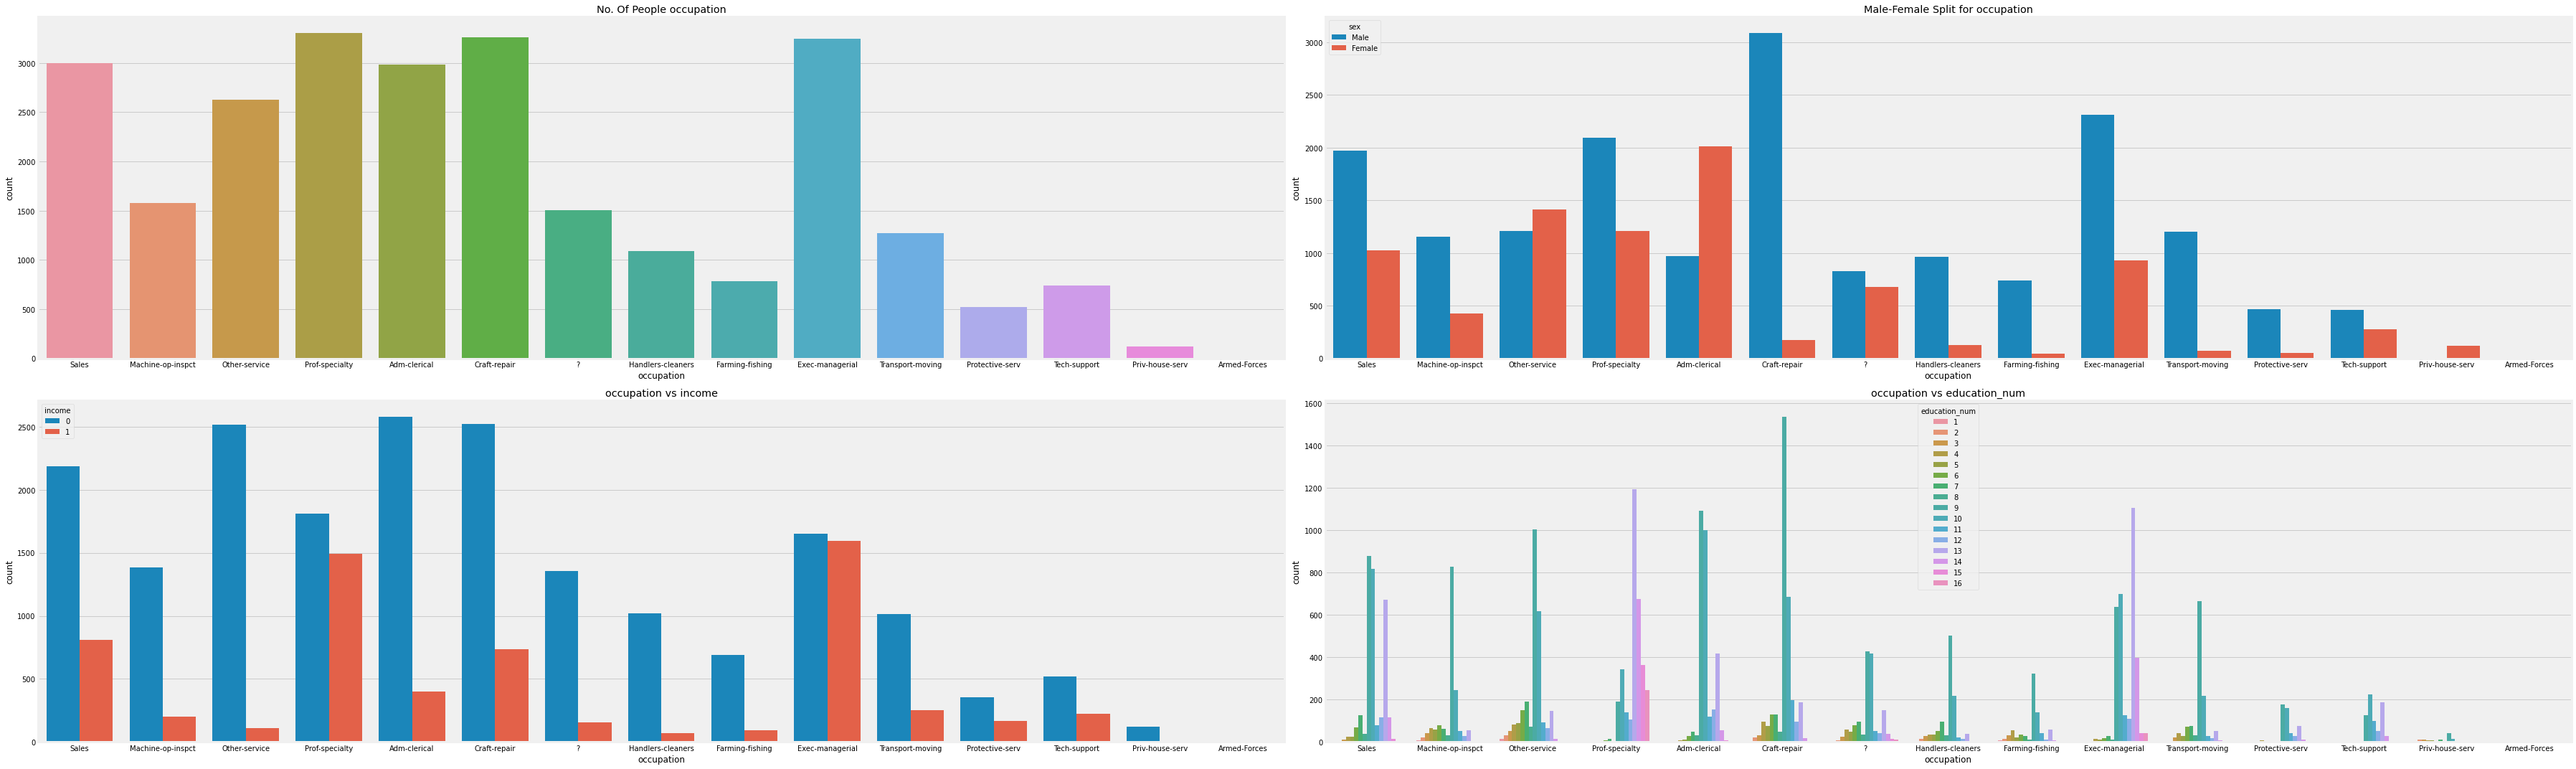

In [116]:
f,ax=plt.subplots(2,2,figsize=(50,15))
sns.countplot('occupation',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of People occupation')
sns.countplot('occupation',hue='sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for occupation')
sns.countplot('occupation',hue='income',data=data,ax=ax[1,0])
ax[1,0].set_title('occupation vs income')
sns.countplot('occupation',hue='education_num',data=data,ax=ax[1,1])
ax[1,1].set_title('occupation vs education_num')
f.tight_layout()
#plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

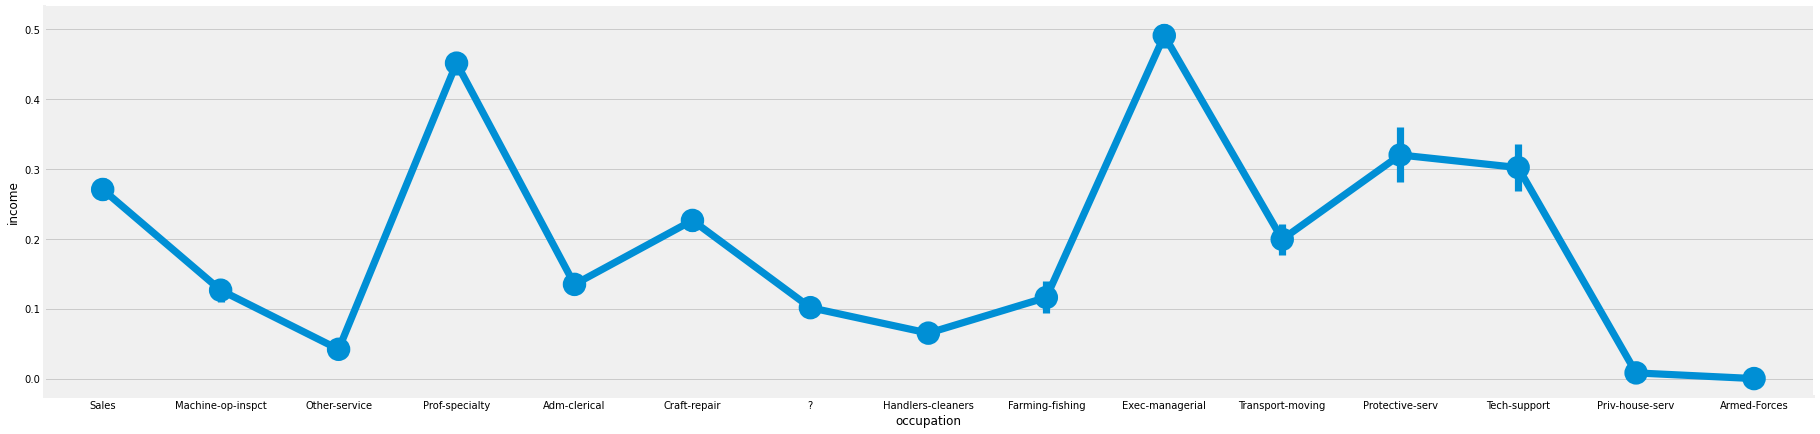

In [39]:
sns.factorplot('occupation','income',data=data)
fig=plt.gcf()
fig.set_size_inches(30,6)
plt.show()

In [135]:
all_data.loc[all_data['occupation'].isin(['Armed-Forces', 'Priv-house-serv']), 'occupation'] = 'Priv-house-serv'

In [26]:
cat_cols = [col for col in data.columns if data[col].dtype in ['O']]

In [27]:
cat_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

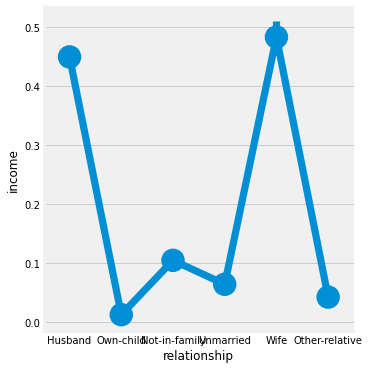

In [132]:
sns.factorplot('relationship', 'income', data=data)
plt.show()

In [95]:
all_data['relationship'].unique()

array(['Husband', 'Own-child', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [98]:
all_data.loc[all_data['relationship'].isin(['Husband', 'Wife']), 'relationship'] = 'normal'
all_data.loc[all_data['relationship'].isin(['Own-child', 'Not-in-family', 'Unmarried', 'Other-relative']), 'relationship'] = 'abnormal'

In [102]:
all_data.loc[all_data['marital_status'].isin(['Married-AF-spouse', 'Married-civ-spouse']), 'marital_status'] = 'Married'
all_data.loc[all_data['marital_status'].isin(['Married-spouse-absent', 'Divorced', 'Never-married', 'Separated', 'Widowed']), 'marital_status']= 'Never-married'

In [107]:
all_data['marital_status'].unique()

array(['Married', 'Never-married'], dtype=object)

In [35]:
data['workclass'].value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

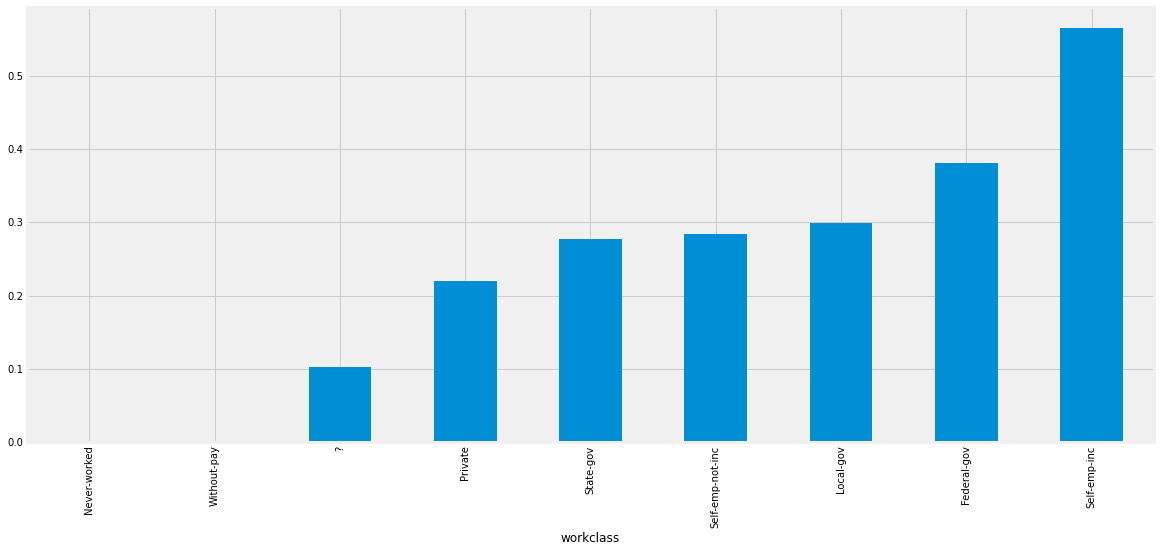

In [128]:
data.groupby(['workclass'])['income'].mean().sort_values().plot(kind='bar', figsize=(18,8))
plt.show()

In [131]:
all_data['workclass'].unique()

array(['Private', 'State-gov', '?', 'Self-emp-not-inc', 'Local-gov',
       'Federal-gov', 'Self-emp-inc', 'others'], dtype=object)

In [130]:
all_data.loc[all_data['workclass'].isin(['Never-worked', 'Without-pay']), 'workclass'] = 'others'

In [136]:
all_data['native_country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [137]:
income_01 = ['Jamaica',
 'Haiti',
 'Puerto-Rico',
 'Laos',
 'Thailand',
 'Ecuador',]

income_02 = ['Outlying-US(Guam-USVI-etc)',
 'Honduras',
 'Columbia',
 'Dominican-Republic',
 'Mexico',
 'Guatemala',
 'Portugal',
 'Trinadad&Tobago',
 'Nicaragua',
 'Peru',
 'Vietnam',
 'El-Salvador',]

income_03 = ['Poland',
 'Ireland',
 'South',
 'China',]

income_04 = [
    'United-States',
]
income_05 = [
 'Greece',
 'Scotland',
 'Cuba',
 'Hungary',
 'Hong',
 'Holand-Netherlands',
]
income_06 = [
 'Philippines',
 'Canada',
]
income_07 = [
 'England',
 'Germany',
]

income_08 = [
 'Italy',
 'India',
 'Japan',
 'France',
 'Yugoslavia',
 'Cambodia',
]

income_09 = [
 'Taiwan',
 'Iran',
]

income_other=['?', ]

In [138]:
def convert_country(x):
    if x in income_01:
        return 'income_01'
    elif x in income_02:
        return 'income_02'
    elif x in income_03:
        return 'income_03'
    elif x in income_04:
        return 'income_04'
    elif x in income_05:
        return 'income_05'
    elif x in income_06:
        return 'income_06'
    elif x in income_07:
        return 'income_07'
    elif x in income_08:
        return 'income_08'
    elif x in income_09:
        return 'income_09'
    else:
        return 'income_other'

In [139]:
all_data['country_bin'] = all_data['native_country'].apply(convert_country)

In [140]:
all_data['country_bin'].value_counts()


income_04       29170
income_02        1157
income_other      583
income_06         319
income_01         303
income_08         299
income_03         239
income_07         227
income_05         170
income_09          94
Name: country_bin, dtype: int64

In [141]:
all_data.columns

Index(['id', 'age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income', 'fnlwgt_log',
       'country_bin'],
      dtype='object')

In [142]:
features = [
    'age', 
    'workclass', 
    'fnlwgt_log', 
    'education', 
    'marital_status',
    'occupation',
    'relationship', 
    'race',
    'sex',
    'capital_gain',
    'capital_loss', 
    'hours_per_week',
    'country_bin',
]

In [143]:
label = [
    'income'
]

In [144]:
all_data_dummies = pd.get_dummies(all_data[features + label])
all_data_dummies.head()

,age,fnlwgt_log,capital_gain,capital_loss,hours_per_week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,country_bin_income_01,country_bin_income_02,country_bin_income_03,country_bin_income_04,country_bin_income_05,country_bin_income_06,country_bin_income_07,country_bin_income_08,country_bin_income_09,country_bin_income_other
0,40,12.034917,0,0,60,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,17,11.529055,0,0,20,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,18,12.775237,0,0,16,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,21,11.926081,0,0,25,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,24,11.713693,0,0,20,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [146]:
train_features = all_data_dummies.drop('income', 1).iloc[:len(data)]
test_features = all_data_dummies.drop('income', 1).iloc[len(data):]

In [147]:
train_features.shape, test_features.shape

((26049, 56), (6512, 56))

In [149]:
train_label = data[label]

In [150]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score, confusion_matrix
from sklearn.metrics import log_loss
from tqdm import tqdm_notebook
import lightgbm as lgbm

ModuleNotFoundError: No module named 'sklearn'